<a href="https://colab.research.google.com/github/musti9311/CodTech-Internship/blob/main/Sentiment_Analysis_with_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# The objective was to build a Natural Language Processing (NLP) model to classify customer reviews as "Positive" or "Negative".
# We utilized TF-IDF for feature extraction and Logistic Regression for classification.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#We use the NLTK Movie Reviews dataset (Standard dataset for Sentiment Analysis)

nltk.download('movie_reviews')
nltk.download('stopwords')
nltk.download('punkt')
print("Loading dataset...")

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Loading dataset...


In [3]:
# Construct the dataset from NLTK
documents = []
for category in movie_reviews.categories():
    for fileid in movie_reviews.fileids(category):
        documents.append((movie_reviews.raw(fileid), category))

In [4]:
# Convert to Pandas DataFrame
df = pd.DataFrame(documents, columns=['review', 'sentiment'])

In [5]:
# Map 'pos' to 1 and 'neg' to 0 for Logistic Regression
df['label'] = df['sentiment'].map({'pos': 1, 'neg': 0})

print(f"Dataset Loaded. Total Reviews: {len(df)}")
print(df.head())
print("-" * 30)

Dataset Loaded. Total Reviews: 2000
                                              review sentiment  label
0  plot : two teen couples go to a church party ,...       neg      0
1  the happy bastard's quick movie review \ndamn ...       neg      0
2  it is movies like these that make a jaded movi...       neg      0
3   " quest for camelot " is warner bros . ' firs...       neg      0
4  synopsis : a mentally unstable man undergoing ...       neg      0
------------------------------


In [6]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    words = text.split()
    filtered_words = [w for w in words if w not in stop_words]
    return " ".join(filtered_words)

print("Preprocessing text data...")
df['clean_review'] = df['review'].apply(preprocess_text)


Preprocessing text data...


In [7]:
# Initialize TF-IDF Vectorizer
# max_features=5000 keeps the top 5,000 most important words to speed up training
tfidf = TfidfVectorizer(max_features=5000)

X = tfidf.fit_transform(df['clean_review']).toarray()
y = df['label']

In [8]:
# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
print("Training Logistic Regression Model...")
model = LogisticRegression()
model.fit(X_train, y_train)



Training Logistic Regression Model...


LogisticRegression()

In [10]:
# Predict
y_pred = model.predict(X_test)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


Model Accuracy: 83.00%

Classification Report:

              precision    recall  f1-score   support

    Negative       0.83      0.83      0.83       199
    Positive       0.83      0.83      0.83       201

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



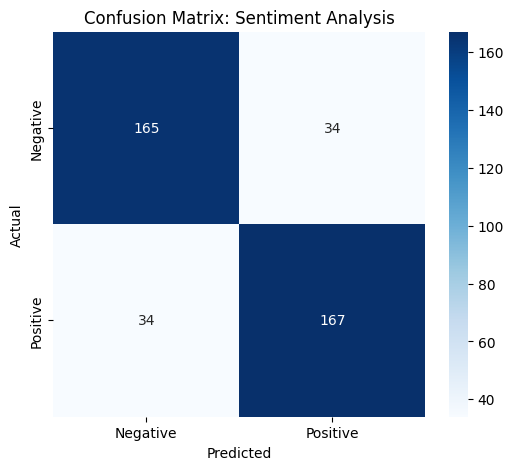

In [12]:
# 1. Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix: Sentiment Analysis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
# 2. Visualize Top Positive & Negative Words (Coefficients)
# Get feature names (words)
feature_names = np.array(tfidf.get_feature_names_out())
# Get coefficients from the model
coefs = model.coef_.flatten()


In [14]:
# Sort coefficients
sorted_indices = np.argsort(coefs)

# Top 10 Negative & Positive words
top_negative = feature_names[sorted_indices[:10]]
top_positive = feature_names[sorted_indices[-10:]]

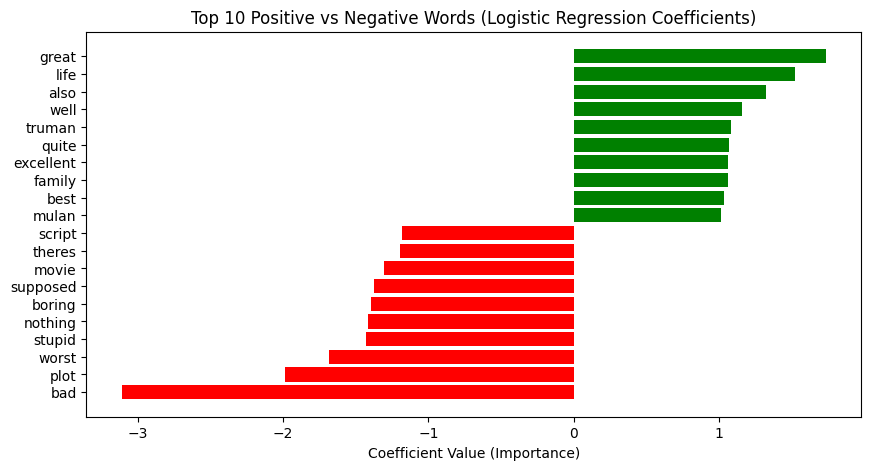

In [15]:
plt.figure(figsize=(10, 5))
colors = ['red'] * 10 + ['green'] * 10
plt.barh(np.concatenate([top_negative, top_positive]),
         np.concatenate([coefs[sorted_indices[:10]], coefs[sorted_indices[-10:]]]),
         color=colors)
plt.title("Top 10 Positive vs Negative Words (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value (Importance)")
plt.show()